# Blinkit Sales: Exploratory Data Analysis with Python

### Documentation Overview:

This dataset consists of 9 different CSV files containing different categories of information. This document is organized by file, where the cleaning, manipulation, and exploration process is repeated for each one. I will clean and explore each file individually before laying out all of my findings at the end to produce a comprehensive summary containing key business insights and recommendations. 

In [319]:
#create data dictionary table?
-*Note: the 'mrp' column stands for Maximum Retail Price.*

### File 1: Blinket Products
This file contains key product information. Upon viewing it, I developed these questions to answer:
- What is the average list price and profit margin across all products, and how do these vary by category?
- Which products have the highest and lowest profit margin?
- fill
- 
*Note: the 'mrp' column stands for Maximum Retail Price.*

In [328]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# loading csv into a dataframe
product_df = pd.read_csv('/Users/tovi/Documents/blinkit_products.csv')
product_df

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55
...,...,...,...,...,...,...,...,...,...,...
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94


In [331]:
#checking the shape of df
product_df.shape

(268, 10)

In [7]:
# general descriptive stats
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [8]:
# checking for duplicates
product_df.duplicated().sum()

0

In [9]:
# checking for null values
null_check = product_df.isnull().sum()
print(null_check)

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64


#### Pricing & Margins

In [324]:
# calculating average price and margin percentage
product_df[['price', 'margin_percentage']].mean()

price                488.356828
margin_percentage     27.779851
dtype: float64

In [326]:
# calcultaing margin percentage variation across categories
product_df.groupby('category')['margin_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Baby Care,16.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Cold Drinks & Juices,22.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Dairy & Breakfast,30.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0
Fruits & Vegetables,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Grocery & Staples,24.0,15.0,0.0,15.0,15.0,15.0,15.0,15.0
Household Care,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Instant & Frozen Food,20.0,40.0,0.0,40.0,40.0,40.0,40.0,40.0
Personal Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0
Pet Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0


Here is it appears Instant and Frozen Foods category has the highest average margin percentage, with personal Care, Pet Care, and Snacks & Munchies close behind as the categories with the highest margin percentage.

In [14]:
# average price of products in each category
product_df.groupby('category')['price'].mean()

category
Baby Care                516.152500
Cold Drinks & Juices     500.515000
Dairy & Breakfast        569.096333
Fruits & Vegetables      546.535185
Grocery & Staples        397.357500
Household Care           403.194444
Instant & Frozen Food    420.345000
Personal Care            441.595600
Pet Care                 546.934000
Pharmacy                 599.026800
Snacks & Munchies        417.106667
Name: price, dtype: float64

# DEL?

In [16]:
# products with highest and lowest markup
product_df['markup'] = product_df['mrp'] - product_df['price']
highest_markup = product_df.loc[product_df['markup'].idxmax()]
lowest_markup = product_df.loc[product_df['markup'].idxmin()]
highest_markup, lowest_markup

(product_id                          305754
 product_name             Frozen Vegetables
 category             Instant & Frozen Food
 brand                         Mammen-Hegde
 price                               979.99
 mrp                                1633.32
 margin_percentage                     40.0
 shelf_life_days                        180
 min_stock_level                         22
 max_stock_level                         81
 markup                              653.33
 Name: 110, dtype: object,
 product_id                        654297
 product_name                    Potatoes
 category             Fruits & Vegetables
 brand                      Chandran-Dass
 price                              13.25
 mrp                                17.67
 margin_percentage                   25.0
 shelf_life_days                        3
 min_stock_level                       20
 max_stock_level                       86
 markup                              4.42
 Name: 21, dtype: object)

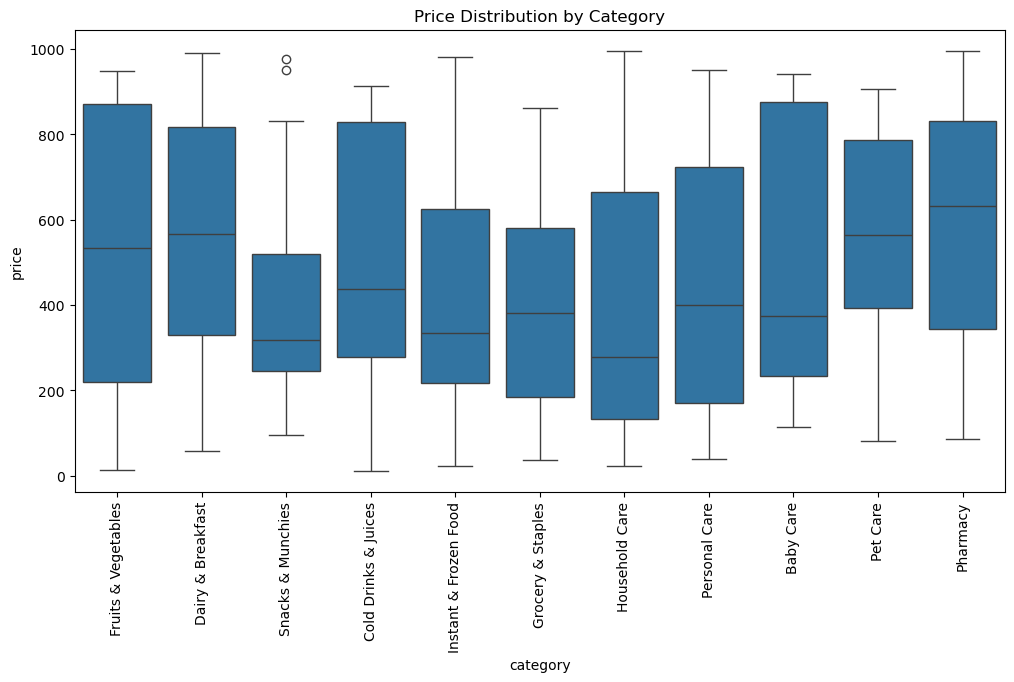

In [17]:
# price distribution across categories
plt.figure(figsize=(12,6))
sns.boxplot(data=product_df, x='category', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Category")
plt.show()


#### Stock & Inventory

In [19]:
# products with highest and lowest stock levels
highest_stock = product_df.loc[product_df['max_stock_level'].idxmax()]
lowest_stock = product_df.loc[product_df['max_stock_level'].idxmin()]
highest_stock, lowest_stock


(product_id                            764014
 product_name                            Salt
 category                   Grocery & Staples
 brand                Grewal, Swamy and Dayal
 price                                 612.04
 mrp                                   720.05
 margin_percentage                       15.0
 shelf_life_days                          365
 min_stock_level                           30
 max_stock_level                          100
 markup                                108.01
 Name: 130, dtype: object,
 product_id                                871592
 product_name                             Carrots
 category                     Fruits & Vegetables
 brand                Shankar, Nadkarni and Kumer
 price                                     870.29
 mrp                                      1160.39
 margin_percentage                           25.0
 shelf_life_days                                3
 min_stock_level                               25
 max_stock_level 

# DEL?

In [20]:
# variation in stock levels across brands
product_df.groupby('brand')[['min_stock_level', 'max_stock_level']].mean()


,min_stock_level,max_stock_level
brand,,
Acharya Ltd,20.0,84.0
Acharya PLC,26.0,88.0
Agarwal-Dhar,21.0,71.0
Agate Ltd,16.0,57.0
Agate and Sons,19.0,55.0
...,...,...
"Wali, Sood and Bala",15.0,50.0
"Wali, Virk and Iyer",27.0,74.0
"Warrior, Ravel and Amble",12.0,61.0


# DEL?

In [21]:
# categories with highest average stock levels
product_df.groupby('category')[['min_stock_level', 'max_stock_level']].mean().sort_values(by='max_stock_level', ascending=False)


,min_stock_level,max_stock_level
category,,
Pet Care,21.600000,78.880000
Grocery & Staples,22.208333,77.750000
Dairy & Breakfast,19.766667,77.433333
Fruits & Vegetables,21.370370,75.407407
Snacks & Munchies,19.888889,74.962963
Household Care,19.074074,74.851852
Personal Care,22.240000,74.640000
Baby Care,18.812500,74.562500
Cold Drinks & Juices,20.363636,71.454545


In [22]:
# category with the most products
product_df['category'].value_counts().idxmax()

'Dairy & Breakfast'

In [348]:
# category with the least products
product_df['category'].value_counts().idxmin()

'Baby Care'

### File 2: Blinket Deliveries
This file contains key information on delivery times.\
Research Questions:
- How frequently are items not delivered on time?
- Are any delivery partners, customers, or stores having repeated issues with delivery?\
**NOTE: need to do some data wrangling and convert the promised and actual delivery times to something that can be read by python- cannot be a string.**

In [356]:
# loading csv into a dataframe
delivery_df = pd.read_csv('/Users/tovi/Documents/blinkit_orders.csv')
delivery_df

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741
...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128


In [370]:
#checking shape
delivery_df.shape

(5000, 11)

In [360]:
# general descriptive stats
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [362]:
delivery_df.shape

(5000, 10)

In [364]:
# checking for duplicates
delivery_df.duplicated().sum()

0

In [366]:
# checking for null values
null_check = delivery_df.isnull().sum()
print(null_check)

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64


In [368]:
# converting delivery times into datetime format to create column of delivery delays:
delivery_df['order_date'] = pd.to_datetime(delivery_df['order_date'])
delivery_df['promised_delivery_time'] = pd.to_datetime(delivery_df['promised_delivery_time'])
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

# Calculate delivery delays in minutes
delivery_df['delivery_delay'] = (delivery_df['actual_delivery_time'] - delivery_df['promised_delivery_time']).dt.total_seconds() / 60


In [32]:
#FIX
lateDeliv=(delivery_df['delivery_delay'] == 0).count()
lateDeliv

5000

In [33]:
average_delivery_time = delivery_df['delivery_delay'].mean()
print(f"Average delivery delay: {average_delivery_time:.2f} minutes")

Average delivery delay: 4.44 minutes


In [34]:
late_deliveries = (delivery_df['delivery_delay'] > 0).mean() * 100
print(f"Late deliveries: {late_deliveries:.2f}%")

Late deliveries: 61.96%


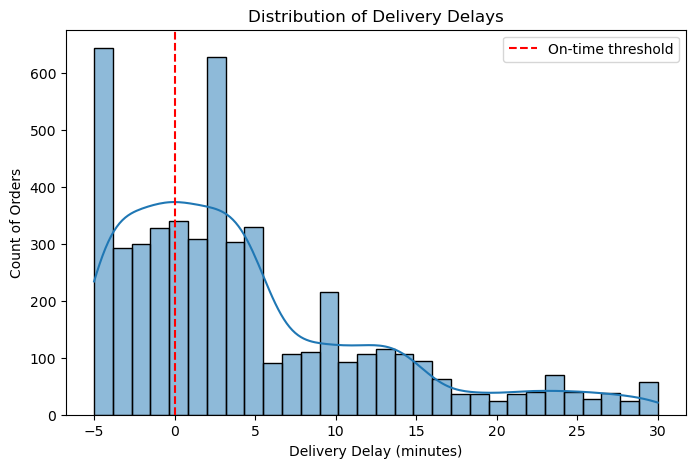

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(delivery_df['delivery_delay'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed', label='On-time threshold')
plt.xlabel("Delivery Delay (minutes)")
plt.ylabel("Count of Orders")
plt.title("Distribution of Delivery Delays")
plt.legend();

Is there a correlation between order total and delivery time delays?

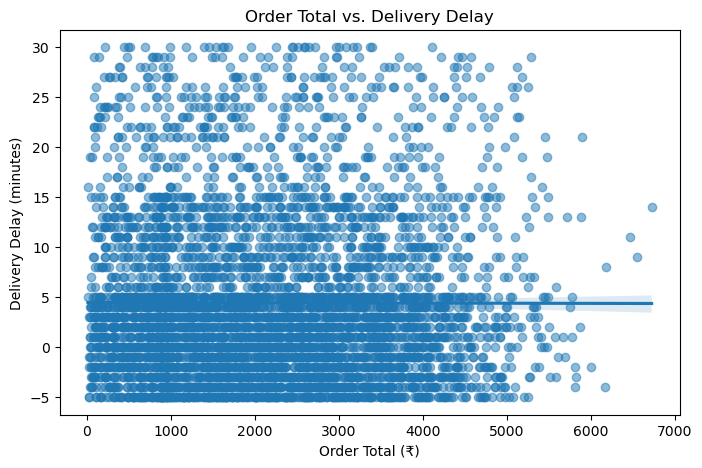

Correlation between order total and delivery delay: -0.00


In [37]:
# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x=delivery_df['order_total'], y=delivery_df['delivery_delay'], scatter_kws={'alpha':0.5})
plt.xlabel("Order Total (₹)")
plt.ylabel("Delivery Delay (minutes)")
plt.title("Order Total vs. Delivery Delay")
plt.show()

# Correlation coefficient
correlation = delivery_df[['order_total', 'delivery_delay']].corr().iloc[0,1]
print(f"Correlation between order total and delivery delay: {correlation:.2f}")

Which store has the highest on-time delivery rate?

store_id
1       1.0
5172    1.0
5116    1.0
5119    1.0
5121    1.0
Name: delivery_delay, dtype: float64


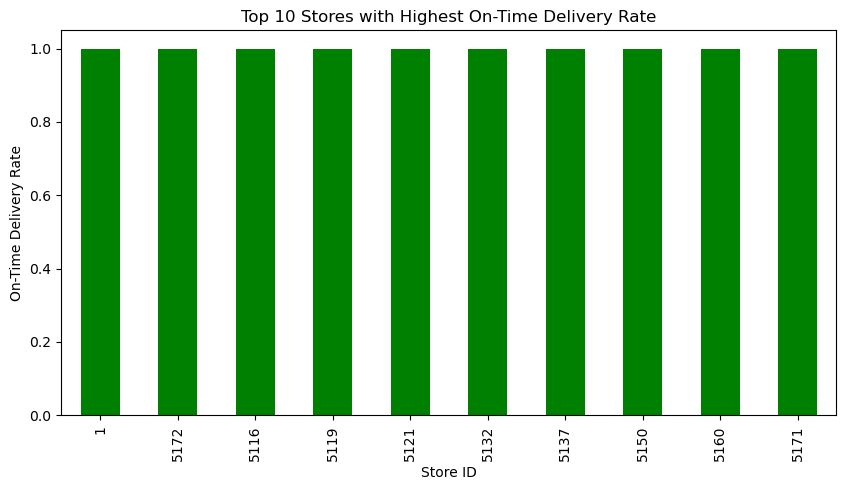

In [39]:
# Compute on-time delivery rate per store
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x <= 0).mean()).sort_values(ascending=False)
print(store_punctuality.head())

# Bar chart of top 10 punctual stores
plt.figure(figsize=(10,5))
store_punctuality.head(10).plot(kind='bar', color='green')
plt.xlabel("Store ID")
plt.ylabel("On-Time Delivery Rate")
plt.title("Top 10 Stores with Highest On-Time Delivery Rate")
plt.show()

delivery_partner_id
43       1
65328    1
66248    1
66274    1
66328    1
dtype: int64


Text(0.5, 1.0, 'Top 10 Delivery Partners with Most Late Deliveries')

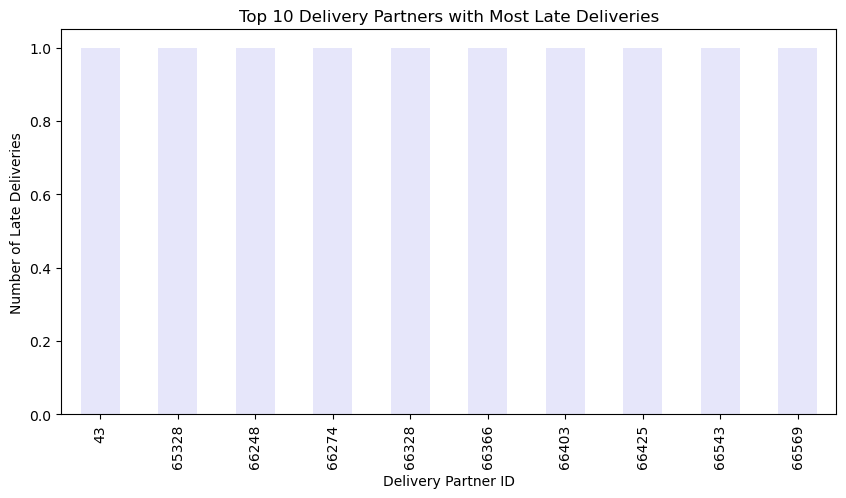

In [40]:
# Count late deliveries per delivery partner
late_per_partner = delivery_df[delivery_df['delivery_delay'] > 0].groupby('delivery_partner_id').size().sort_values(ascending=False)
print(late_per_partner.head())

# Bar chart of top 10 partners with most late deliveries
plt.figure(figsize=(10,5))
late_per_partner.head(10).plot(kind='bar', color='lavender')
plt.xlabel("Delivery Partner ID")
plt.ylabel("Number of Late Deliveries")
plt.title("Top 10 Delivery Partners with Most Late Deliveries")

count    2172.000000
mean     2192.695847
std       998.867775
min        22.140000
25%      1493.453333
50%      2176.281667
75%      2799.329583
max      6161.480000
Name: order_total, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Order Total per Customer')

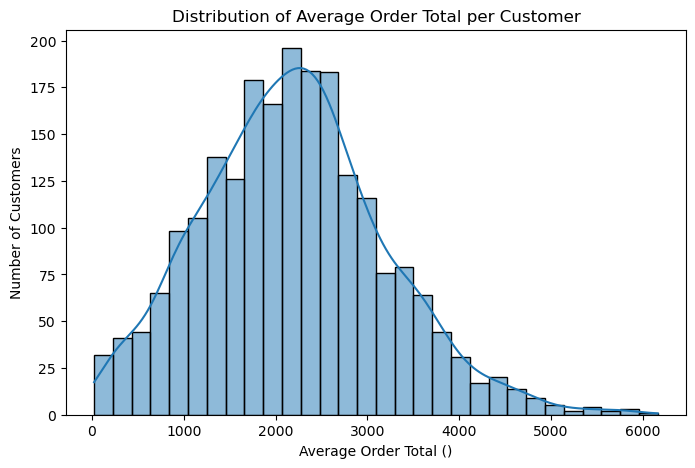

In [41]:
customer_avg_order = delivery_df.groupby('customer_id')['order_total'].mean()
print(customer_avg_order.describe())

# Histogram of average order total per customer
plt.figure(figsize=(8,5))
sns.histplot(customer_avg_order, bins=30, kde=True)
plt.xlabel("Average Order Total ()")
plt.ylabel("Number of Customers")
plt.title("Distribution of Average Order Total per Customer")

customer_id
77869660    9
8791577     8
17805991    8
13604883    7
93018527    7
26285589    7
21701991    7
75213636    7
10562528    7
25128143    7
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Customers by Order Count')

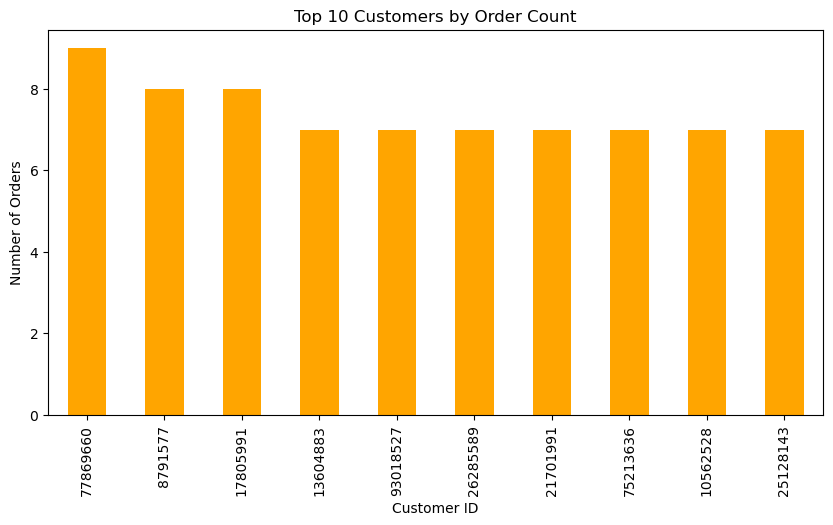

In [42]:
customer_orders = delivery_df['customer_id'].value_counts().head(10)
print(customer_orders)

# Bar chart of top 10 customers by order count
plt.figure(figsize=(10,5))
customer_orders.plot(kind='bar', color='orange')
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.title("Top 10 Customers by Order Count")

payment_method
Card      1285
Cash      1257
Wallet    1244
UPI       1214
Name: count, dtype: int64


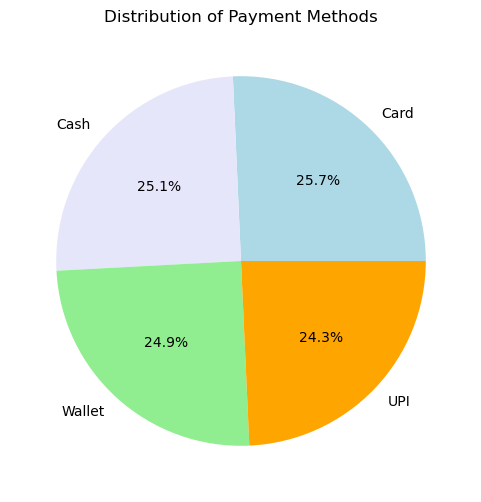

In [43]:
payment_counts = delivery_df['payment_method'].value_counts()
print(payment_counts)

# Pie chart for payment methods
plt.figure(figsize=(6,6));
payment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lavender','lightgreen','orange'])
plt.ylabel("")
plt.title("Distribution of Payment Methods")
plt.show()

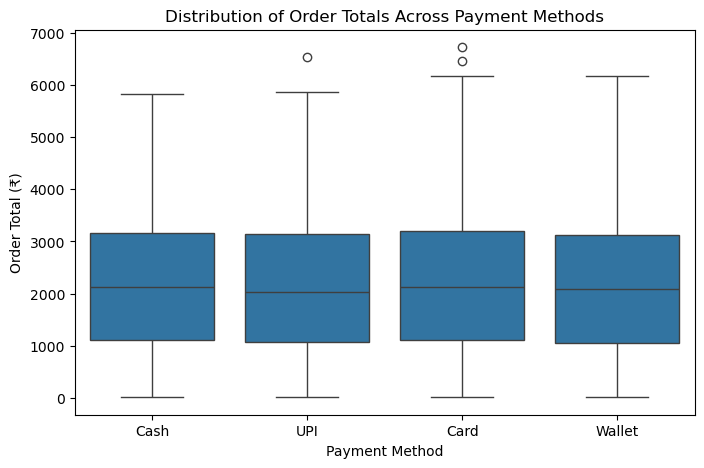

In [44]:
# Boxplot comparing order totals for different payment methods
plt.figure(figsize=(8,5))
sns.boxplot(x='payment_method', y='order_total', data=delivery_df)
plt.xlabel("Payment Method")
plt.ylabel("Order Total (₹)")
plt.title("Distribution of Order Totals Across Payment Methods")
plt.show()


store_id
4771    1
9131    1
319     1
9529    1
5611    1
9881    1
4036    1
5967    1
2723    1
6221    1
Name: count, dtype: int64


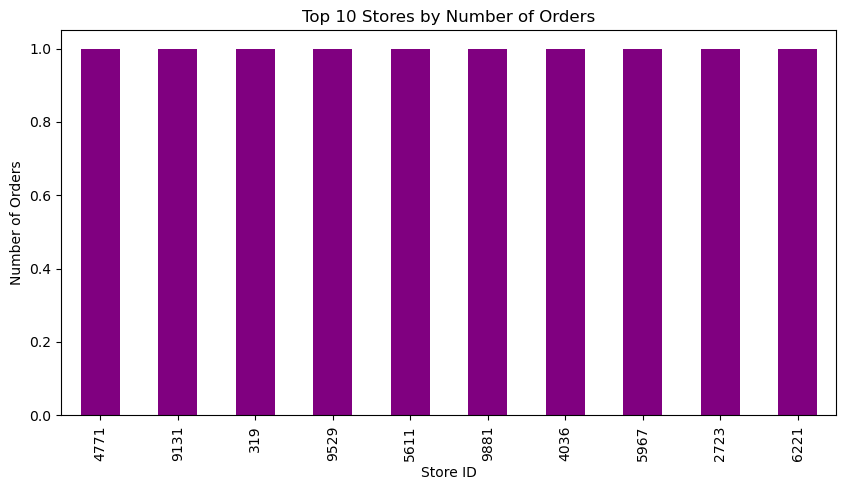

In [45]:
store_order_counts = delivery_df['store_id'].value_counts().head(10)
print(store_order_counts)

# Bar chart of top 10 stores by number of orders
plt.figure(figsize=(10,5))
store_order_counts.plot(kind='bar', color='purple')
plt.xlabel("Store ID")
plt.ylabel("Number of Orders")
plt.title("Top 10 Stores by Number of Orders")
plt.show()


delivery_partner_id
63230    1
53453    1
67163    1
81625    1
48217    1
33503    1
37563    1
33984    1
53744    1
99317    1
Name: count, dtype: int64


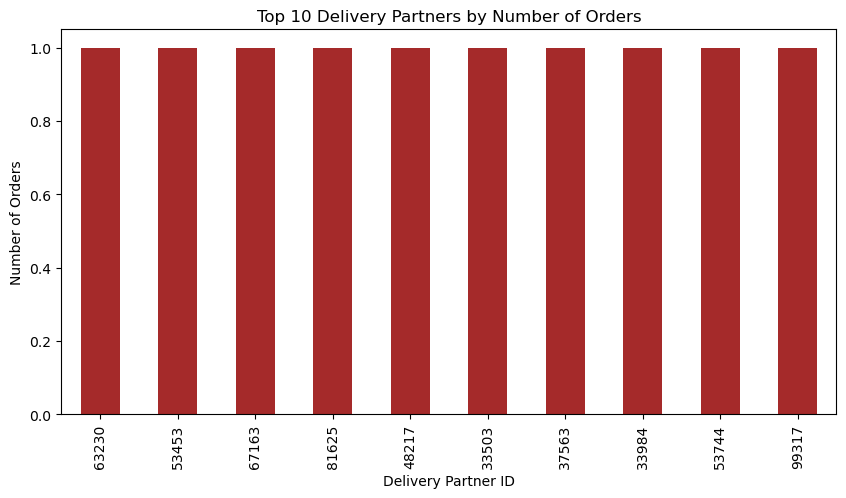

In [46]:
partner_order_counts = delivery_df['delivery_partner_id'].value_counts().head(10)
print(partner_order_counts)

# Bar chart of top 10 delivery partners by number of orders
plt.figure(figsize=(10,5))
partner_order_counts.plot(kind='bar', color='brown')
plt.xlabel("Delivery Partner ID")
plt.ylabel("Number of Orders")
plt.title("Top 10 Delivery Partners by Number of Orders")
plt.show()


store_id
3542   -5.0
6656   -5.0
522    -5.0
6655   -5.0
5684   -5.0
Name: delivery_delay, dtype: float64


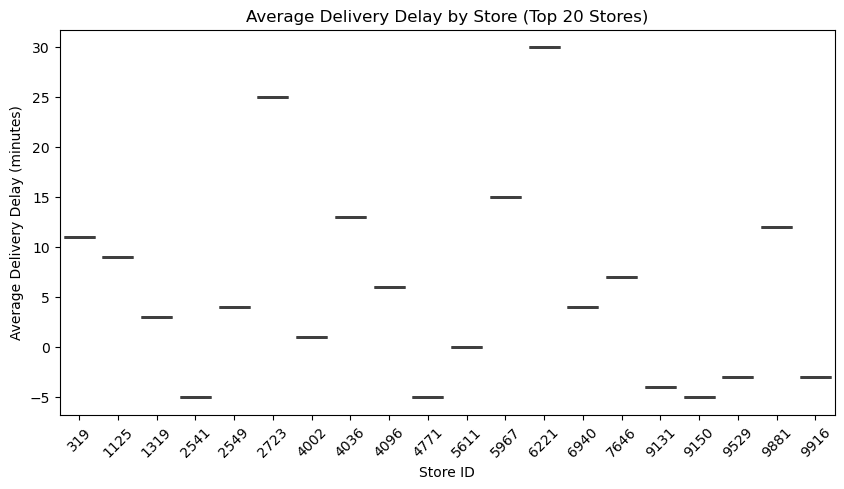

In [47]:
store_avg_delay = delivery_df.groupby('store_id')['delivery_delay'].mean().sort_values() #get average delay for all stores
print(store_avg_delay.head())

# Boxplot of delivery delays by store (top 20 stores by order volume)
top_stores = delivery_df['store_id'].value_counts().head(20).index
plt.figure(figsize=(10,5))
sns.boxplot(x='store_id', y='delivery_delay', data=delivery_df[delivery_df['store_id'].isin(top_stores)], linewidth=2)
plt.xlabel("Store ID")
plt.ylabel("Average Delivery Delay (minutes)")
plt.title("Average Delivery Delay by Store (Top 20 Stores)")
plt.xticks(rotation=45)
plt.show()


Order Volume seems to have little to no impact on delivery delays. The stores that recieve the highest amount of orders all have drastically different delivery delays.

### File 3: Blinket Units
The third file contains information on unit sales and pricing:
**NOTE: run RQs, might not be too useful to analyze as a stand alone file.**

In [50]:
units_df = pd.read_csv('/Users/tovi/Documents/blinkit_order_items.csv')
units_df

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55
...,...,...,...,...
4995,1669690997,925482,3,475.04
4996,8340761903,124290,2,39.65
4997,5936301790,491314,3,973.44
4998,5710579377,319388,2,657.80


In [51]:
units_df.describe()

,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


In [52]:
units_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [53]:
units_df.duplicated().sum()

0

## new column for calculating total order value (units x unit price)

In [55]:
units_df['total_price'] = units_df['quantity'] * units_df['unit_price']
print(units_df.head())  # Display the first few rows to confirm the new column


     order_id  product_id  quantity  unit_price  total_price
0  1961864118      642612         3      517.03      1551.09
1  1549769649      378676         1      881.42       881.42
2  9185164487      741341         2      923.84      1847.68
3  9644738826      561860         1      874.78       874.78
4  5427684290      602241         2      976.55      1953.10


product_id
51036     70
820973    68
604184    62
34186     61
992178    60
Name: quantity, dtype: int64


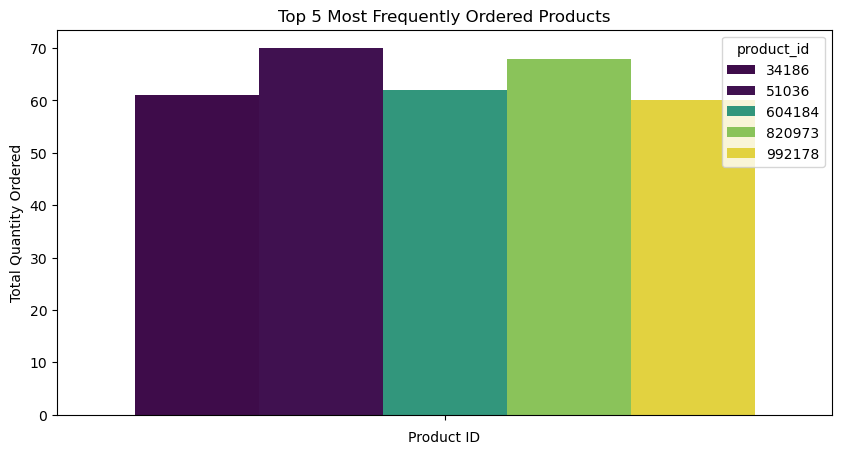

In [56]:
#top 5 Most Frequently Ordered Products
top_products = units_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)

plt.figure(figsize=(10,5))
sns.barplot(hue=top_products.index, y=top_products.values, palette="viridis")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Ordered")
plt.title("Top 5 Most Frequently Ordered Products")
plt.show()


In [57]:
# average order value
order_totals = units_df.groupby('order_id')['total_price'].sum()
average_order_value = order_totals.mean()
print(f"Average Order Value: ${average_order_value:.2f}")


Average Order Value: $994.48


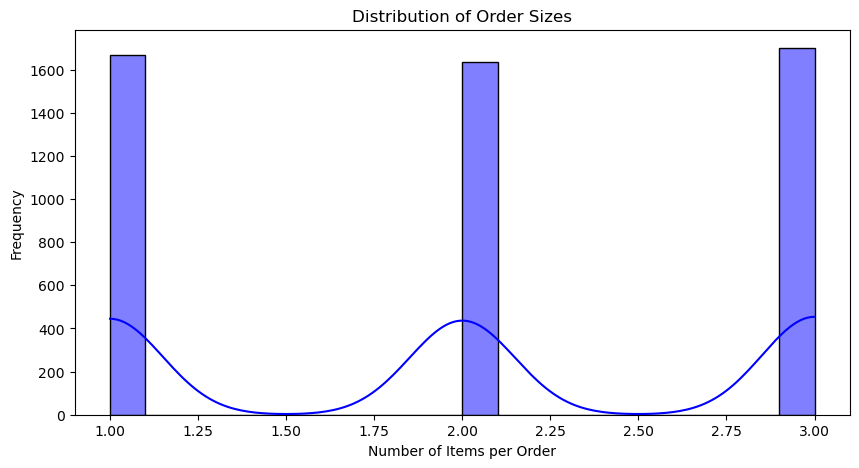

In [58]:
# distribution of order values

order_sizes = units_df.groupby('order_id')['quantity'].sum()

plt.figure(figsize=(10,5))
sns.histplot(order_sizes, bins=20, kde=True, color="blue")
plt.xlabel("Number of Items per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Sizes")
plt.show()


In [59]:
# product generating the most revenue

product_revenue = units_df.groupby('product_id')['total_price'].sum().sort_values(ascending=False)
top_product_id = product_revenue.idxmax()
print(f"Product ID with Highest Revenue: {top_product_id}, Total Revenue: ${product_revenue.iloc[0]:.2f}")


Product ID with Highest Revenue: 51036, Total Revenue: $65212.70


## What is this product

In [61]:
# number of products ordered once
product_order_counts = units_df.groupby('product_id')['order_id'].nunique()
single_order_products = product_order_counts[product_order_counts == 1]
print(f"Number of products ordered only once: {single_order_products.shape[0]}")


Number of products ordered only once: 0


In [62]:
#
most_expensive_product = units_df.loc[units_df['unit_price'].idxmax(), 'product_id']
most_expensive_price = units_df['unit_price'].max()
total_sales_expensive_product = units_df[units_df['product_id'] == most_expensive_product]['total_price'].sum()

print(f"Most Expensive Product ID: {most_expensive_product}, Price: ${most_expensive_price:.2f}")
print(f"Total Sales for Most Expensive Product: ${total_sales_expensive_product:.2f}")


Most Expensive Product ID: 264803, Price: $995.98
Total Sales for Most Expensive Product: $51790.96


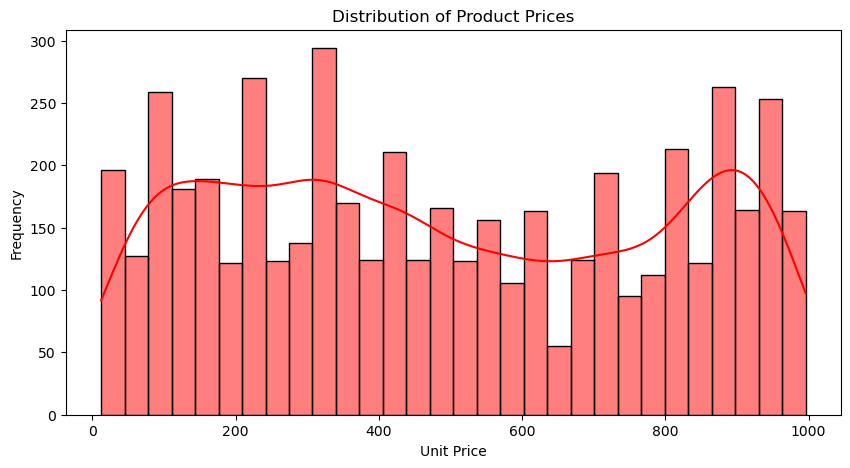

In [63]:
# price distrubution of products

plt.figure(figsize=(10,5))
sns.histplot(units_df['unit_price'], bins=30, kde=True, color="red")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.title("Distribution of Product Prices")
plt.show()


### File 4: Blinkit Marketing Performance

This file contains key information on the marketing performance of the business.
- Optimize ad spend allocation
- Spot seasonal trends
- Understand audience behavior
- Detect correlations and key drivers

In [66]:
mkt_df = pd.read_csv('/Users/tovi/Documents/blinkit_marketing_performance.csv')
mkt_df

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22
...,...,...,...,...,...,...,...,...,...,...,...
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50


Understand the dataset's size and data types:

In [68]:
print(f"Dataset contains {mkt_df.shape[0]} rows and {mkt_df.shape[1]} columns.")
print(mkt_df.info())

Dataset contains 5400 rows and 11 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB
None


Classify campaigns based on ROAS to prioritize high-performing ones:

In [70]:
# which campaign has the highest return on ad spend
highest_roas_campaign = mkt_df.loc[mkt_df['roas'].idxmax(), ['campaign_name', 'roas']]
print(highest_roas_campaign)

campaign_name    Email Campaign
roas                        4.0
Name: 97, dtype: object


In [71]:
# which channel has the highest budget
spend_per_channel = mkt_df.groupby('channel')['spend'].sum().sort_values(ascending=False)
print(spend_per_channel)


channel
App             4213378.75
Social Media    4110363.91
SMS             3998607.54
Email           3997488.04
Name: spend, dtype: float64


In [72]:
# which channel has the highest return on ad spend
highest_roas_channel = mkt_df.loc[mkt_df['roas'].idxmax(), ['channel', 'roas']]
print(highest_roas_channel)

channel    Social Media
roas                4.0
Name: 97, dtype: object


App channel has highest budget but Social Media returns the most revenue.\
**GET RANKED ROAS PER CHANNEL, Identify which channels are most profitable.**

In [74]:
# get the average roas across all channels
average_roas = mkt_df['roas'].mean()
print(f"Average ROAS: {average_roas}")

# get the average roas for each channel
roas_by_channel = mkt_df.groupby('channel')['roas'].mean()
print(roas_by_channel)

Average ROAS: 2.740711111111111
channel
App             2.754301
Email           2.748861
SMS             2.710112
Social Media    2.749188
Name: roas, dtype: float64


Identify wasted ad spend by checking if a campaign spends too much but generates little revenue:

Creating a spend to revenue generated column:

In [77]:
mkt_df['spend_to_revenue_ratio'] = mkt_df['spend'] / mkt_df['revenue_generated']
print(mkt_df[['campaign_name', 'spend', 'revenue_generated', 'spend_to_revenue_ratio']].sort_values(by='spend_to_revenue_ratio'))


              campaign_name    spend  revenue_generated  \
3390  App Push Notification  1006.73            9745.83   
1880       Referral Program  1027.21            9771.28   
342       New User Discount  1025.98            9484.10   
1689  App Push Notification  1084.64            9928.87   
438   App Push Notification  1037.53            9489.14   
...                     ...      ...                ...   
2363     Category Promotion  4988.24            2115.72   
3289       Membership Drive  4869.31            2050.57   
1526     Category Promotion  4922.14            2067.33   
1388         Festival Offer  4910.55            2034.19   
2824         Email Campaign  4981.87            2038.51   

      spend_to_revenue_ratio  
3390                0.103299  
1880                0.105125  
342                 0.108179  
1689                0.109241  
438                 0.109339  
...                      ...  
2363                2.357703  
3289                2.374613  
1526        

In [78]:
mkt_df.spend_to_revenue_ratio.describe()

count    5400.000000
mean        0.614911
std         0.399164
min         0.103299
25%         0.340199
50%         0.508740
75%         0.775267
max         2.443878
Name: spend_to_revenue_ratio, dtype: float64

In [79]:
# get the campaign that had the highest conversion rate
mkt_df['conversion_rate'] = mkt_df['conversions'] / mkt_df['clicks']
highest_conversion_rate_campaign = mkt_df.loc[mkt_df['conversion_rate'].idxmax(), ['campaign_name', 'conversion_rate', 'revenue_generated','channel']]
highest_conversion_rate_campaign

#print(highest_conversion_rate_campaign).groupby('channel')['roas'].mean()
#print(roas_by_channel)

campaign_name        Festival Offer
conversion_rate                0.94
revenue_generated           3074.89
channel                Social Media
Name: 3440, dtype: object

Track performance fluctuations over time:

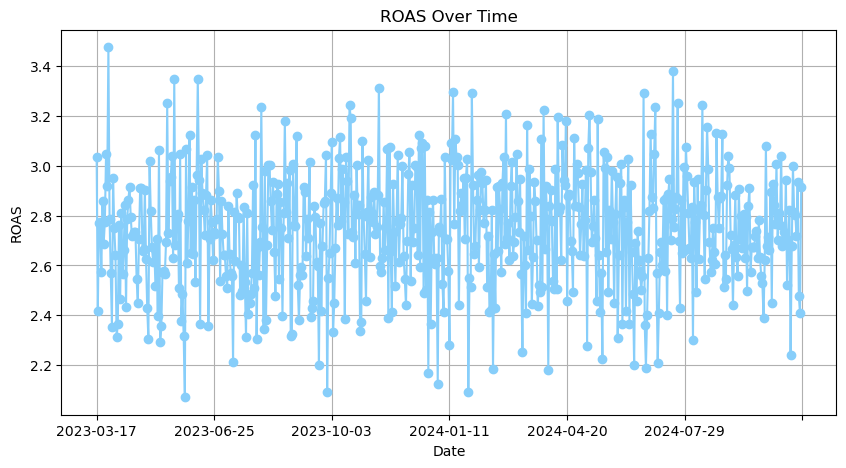

In [81]:
daily_roas = mkt_df.groupby('date')['roas'].mean()

plt.figure(figsize=(10, 5))
daily_roas.plot(title="ROAS Over Time", marker='o', color='lightskyblue')
plt.xlabel("Date")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()


In [82]:
# how do these performance metrics correlate to overall roas?
correlation_matrix = mkt_df[['impressions', 'clicks', 'conversions', 'roas']].corr()
print(correlation_matrix)

             impressions    clicks  conversions      roas
impressions     1.000000  0.002873    -0.000508 -0.005031
clicks          0.002873  1.000000    -0.002899 -0.031176
conversions    -0.000508 -0.002899     1.000000 -0.000676
roas           -0.005031 -0.031176    -0.000676  1.000000


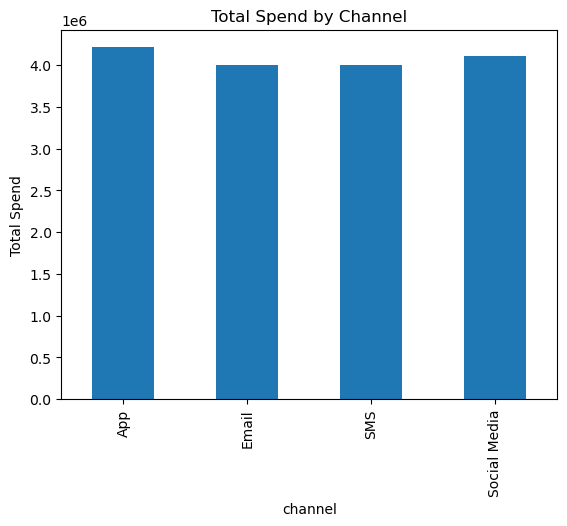

In [83]:
mkt_df.groupby('channel')['spend'].sum().plot(kind='bar', title="Total Spend by Channel")
plt.ylabel("Total Spend")
plt.show()

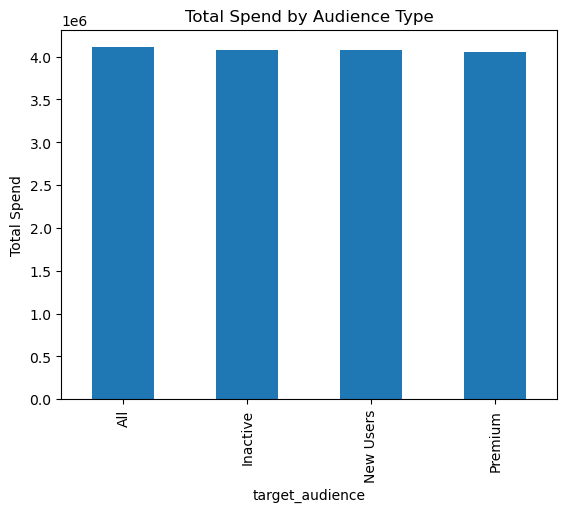

In [84]:
mkt_df.groupby('target_audience')['spend'].sum().plot(kind='bar', title="Total Spend by Audience Type")
plt.ylabel("Total Spend")
plt.show()

In [85]:
#audience that generates the most revenue
revenue_by_audience = mkt_df.groupby('target_audience')['revenue_generated'].sum().sort_values(ascending=False)
print(revenue_by_audience)

target_audience
New Users    8142498.88
Inactive     8105791.01
All          7978638.29
Premium      7966479.19
Name: revenue_generated, dtype: float64


In [86]:
# conversion rate by audience
conversion_rate_by_audience = mkt_df.groupby('target_audience')['conversion_rate'].mean()
print(conversion_rate_by_audience)

target_audience
All          0.143187
Inactive     0.140622
New Users    0.145932
Premium      0.138638
Name: conversion_rate, dtype: float64


In [87]:
# which channel has the highest engagement
mkt_df['engagement_rate'] = mkt_df['clicks'] / mkt_df['impressions']
highest_engagement_channel = mkt_df.groupby('channel')['engagement_rate'].mean().sort_values(ascending=False)
print(highest_engagement_channel)

channel
Email           0.148540
SMS             0.142717
Social Media    0.139354
App             0.137087
Name: engagement_rate, dtype: float64


In [88]:
#are there seasonal trends in campaign performance
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum()
print(conversions_by_day)

day_of_week
Friday       42149
Monday       41933
Saturday     44829
Sunday       42796
Thursday     43186
Tuesday      41488
Wednesday    41657
Name: conversions, dtype: int64


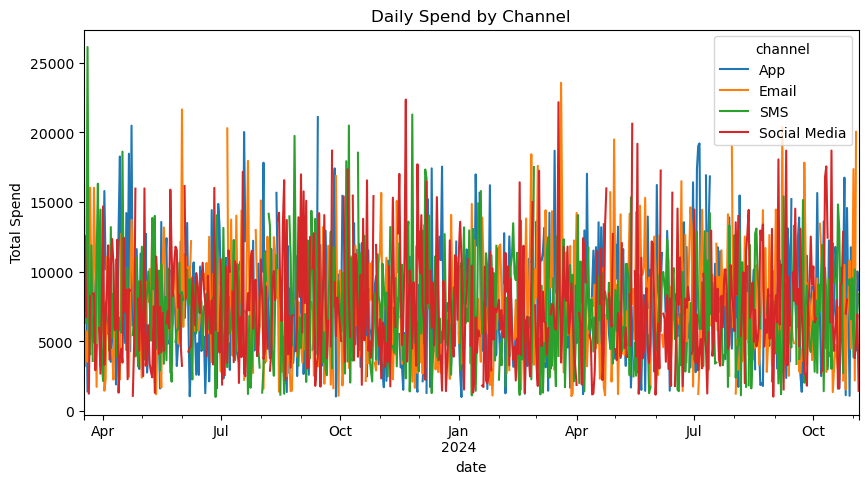

In [89]:
# daily spend across campaigns and channels- FIX BECAUSE THIS IS ATROCIOUS!!
daily_spend = mkt_df.groupby(['date', 'channel'])['spend'].sum().unstack()
daily_spend.plot(title="Daily Spend by Channel", figsize=(10, 5))
plt.ylabel("Total Spend")
plt.show()

In [90]:
performance_by_day = mkt_df.groupby('day_of_week')[['roas', 'conversion_rate']].mean()
print(performance_by_day)

                 roas  conversion_rate
day_of_week                           
Friday       2.763088         0.146200
Monday       2.731421         0.142966
Saturday     2.701912         0.149593
Sunday       2.771305         0.145891
Thursday     2.750954         0.140848
Tuesday      2.754819         0.137071
Wednesday    2.711255         0.131965


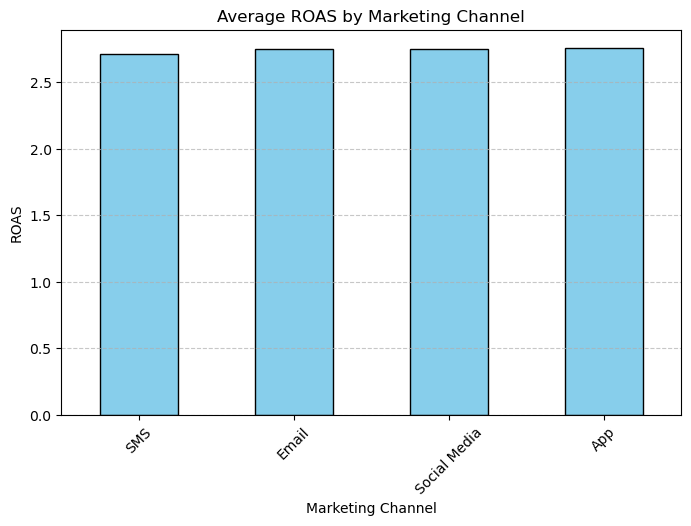

In [91]:
roas_by_channel = mkt_df.groupby('channel')['roas'].mean().sort_values()

plt.figure(figsize=(8, 5))
roas_by_channel.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average ROAS by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("ROAS")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

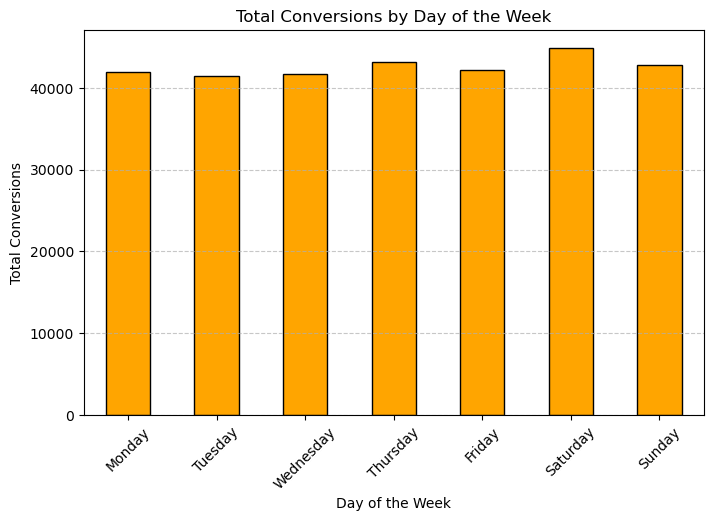

In [92]:
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()
conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum()

plt.figure(figsize=(8, 5))
conversions_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Total Conversions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Conversions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

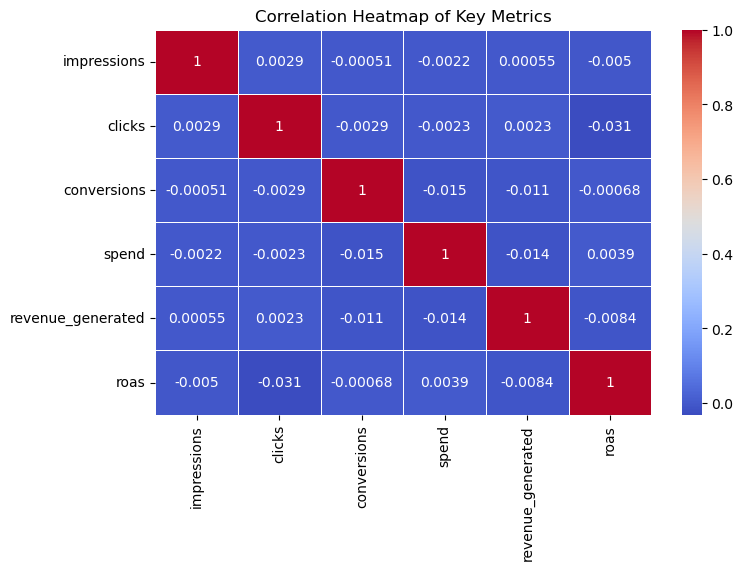

In [93]:
plt.figure(figsize=(8, 5))
sns.heatmap(mkt_df[['impressions', 'clicks', 'conversions', 'spend', 'revenue_generated', 'roas']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

 A violin plot shows the distribution and density of ROAS across different channels:

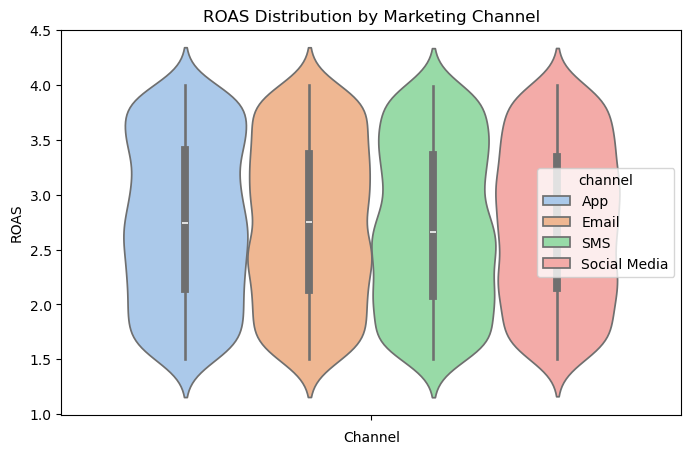

In [95]:
plt.figure(figsize=(8, 5))
sns.violinplot(hue='channel', y='roas', data=mkt_df, palette='pastel')
plt.title("ROAS Distribution by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("ROAS")
plt.xticks(rotation=45)
plt.show()

This helps identify which channel has the highest engagement in terms of clicks per impression:

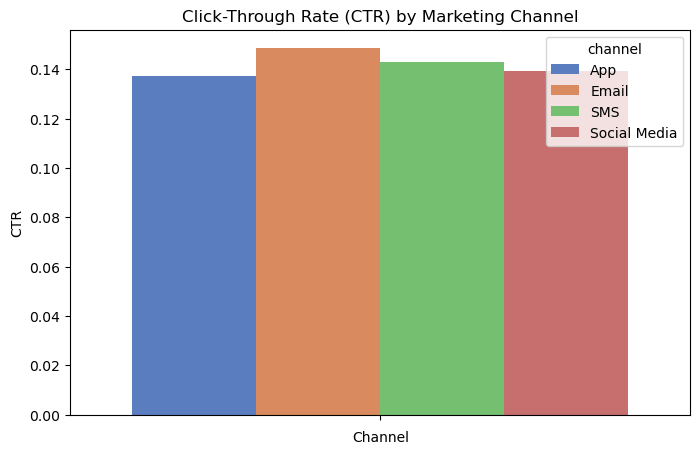

In [97]:
mkt_df['ctr'] = mkt_df['clicks'] / mkt_df['impressions']  # calculate Click-Through Rate (CTR)

plt.figure(figsize=(8, 5))
sns.barplot(hue='channel', y='ctr', data=mkt_df, palette='muted', errorbar=None)
plt.title("Click-Through Rate (CTR) by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.show()

A box plot shows the spread and outliers in conversion rates for different audience segments:

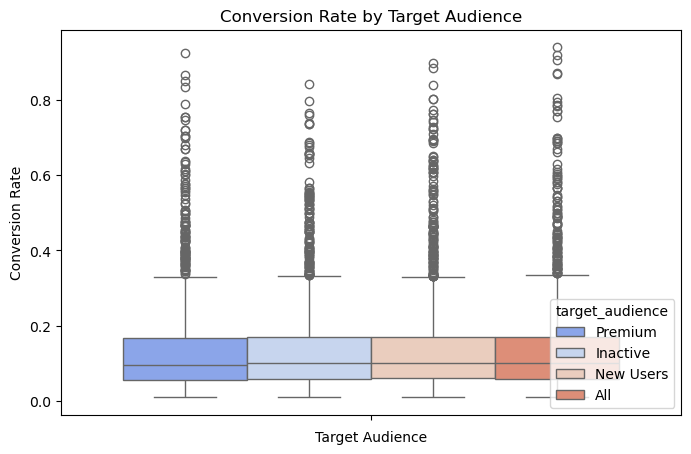

In [99]:
plt.figure(figsize=(8, 5))
sns.boxplot(hue='target_audience', y='conversion_rate', data=mkt_df, palette='coolwarm')
plt.title("Conversion Rate by Target Audience")
plt.xlabel("Target Audience")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

A heatmap helps identify which target audience and channel combinations yield the best ROAS:

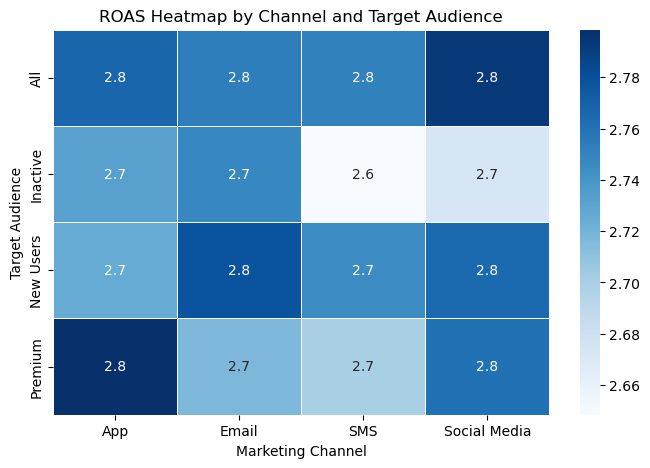

In [101]:
pivot = mkt_df.pivot_table(values='roas', index='target_audience', columns='channel', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='Blues', linewidths=0.5)
plt.title("ROAS Heatmap by Channel and Target Audience")
plt.xlabel("Marketing Channel")
plt.ylabel("Target Audience")
plt.show()

This shows trends in conversions over time, helping to spot seasonal effects or spikes.

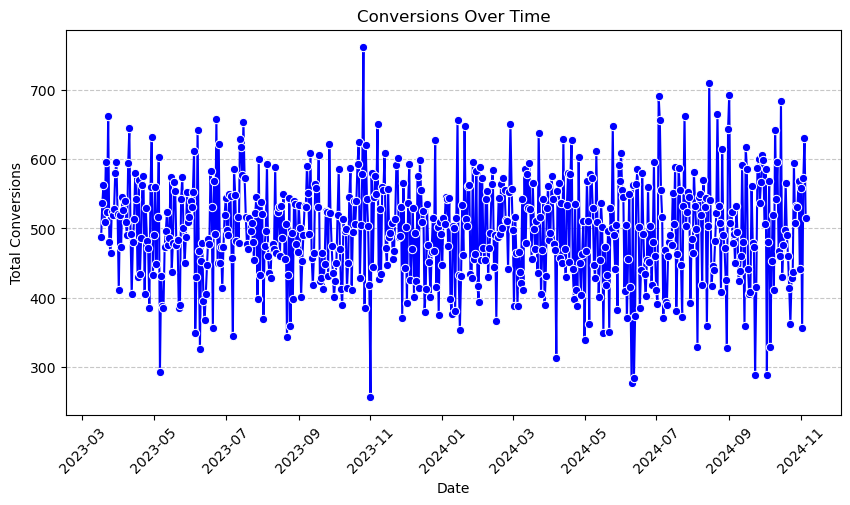

In [103]:
mkt_df['date'] = pd.to_datetime(mkt_df['date'])  # ensure date is in datetime format
daily_conversions = mkt_df.groupby('date')['conversions'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='conversions', data=daily_conversions, marker='o', color='blue')
plt.title("Conversions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Conversions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A kernel density estimate (KDE) plot helps visualize the distribution of revenue:

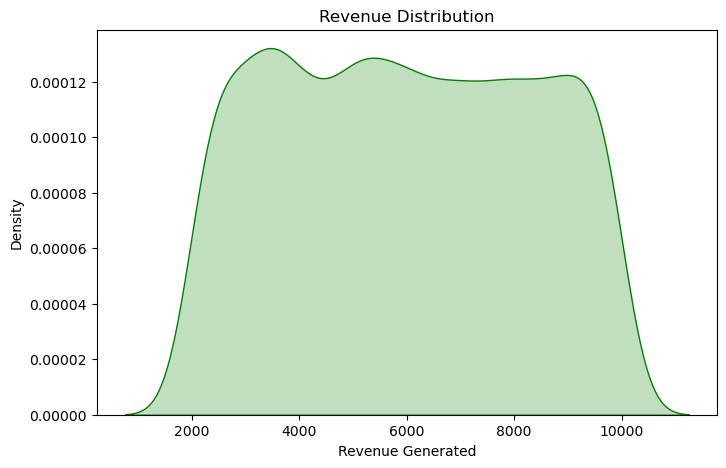

In [105]:
plt.figure(figsize=(8, 5))
sns.kdeplot(mkt_df['revenue_generated'], fill=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue Generated")
plt.ylabel("Density")
plt.show()

Identify campaigns with the best return on investment (ROI):

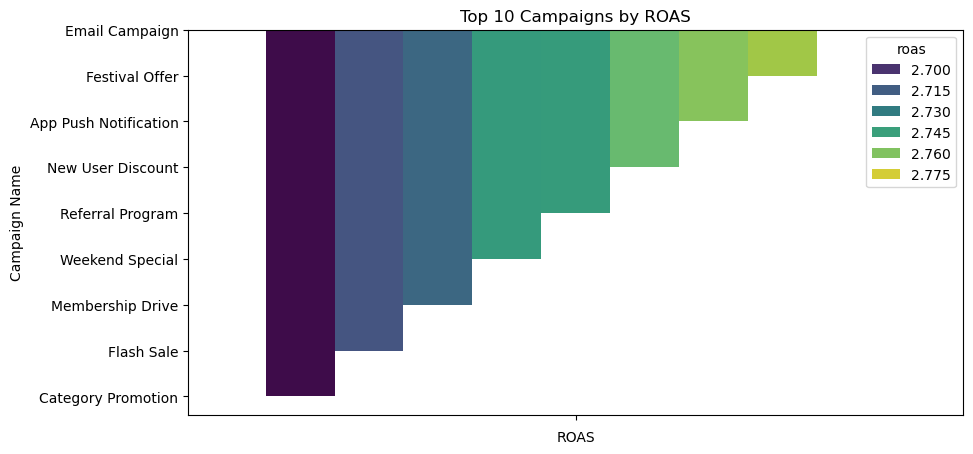

In [107]:
top_campaigns = mkt_df.groupby('campaign_name')['roas'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y='campaign_name', hue='roas', data=top_campaigns, palette='viridis',)
plt.title("Top 10 Campaigns by ROAS")
plt.xlabel("ROAS")
plt.ylabel("Campaign Name")
plt.show()

Check if high clicks lead to conversions:

In [109]:
correlation = np.corrcoef(mkt_df['clicks'], mkt_df['conversions'])[0, 1]
print(f"Correlation between Clicks and Conversions: {correlation:.2f}")

Correlation between Clicks and Conversions: -0.00


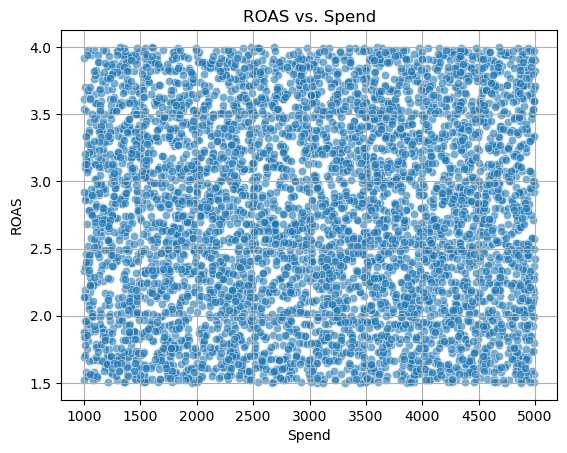

In [110]:
sns.scatterplot(x='spend', y='roas', data=mkt_df, alpha=0.6)
plt.title("ROAS vs. Spend")
plt.xlabel("Spend")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

Identify drop-off points in the marketing funnel.

In [112]:
mkt_df['impression_to_click'] = mkt_df['clicks'] / mkt_df['impressions']
mkt_df['click_to_conversion'] = mkt_df['conversions'] / mkt_df['clicks']

print(mkt_df[['channel', 'impression_to_click', 'click_to_conversion']].groupby('channel').mean())


              impression_to_click  click_to_conversion
channel                                               
App                      0.137087             0.144894
Email                    0.148540             0.138424
SMS                      0.142717             0.138857
Social Media             0.139354             0.146134


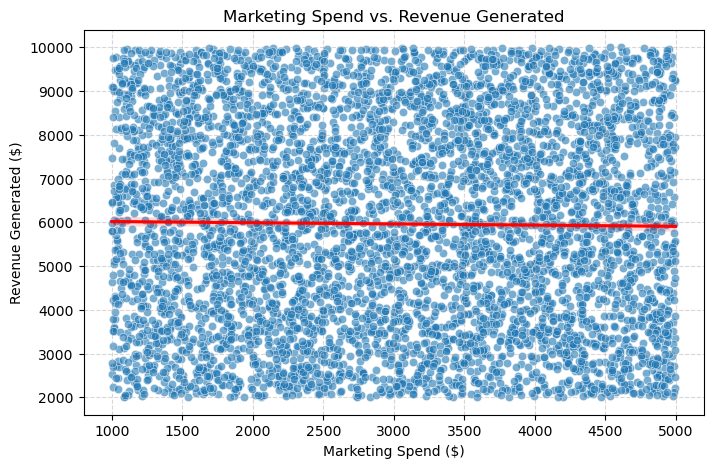

In [113]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='spend', y='revenue_generated', data=mkt_df, alpha=0.6)
sns.regplot(x='spend', y='revenue_generated', data=mkt_df, scatter=False, color='red')
plt.title("Marketing Spend vs. Revenue Generated")
plt.xlabel("Marketing Spend ($)")
plt.ylabel("Revenue Generated ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Which campaigns have the most efficient budget allocation:

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_2312/2859350517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='spend_to_revenue_ratio', data=mkt_df.sort_values(by='spend_to_revenue_ratio'), palette='coolwarm')


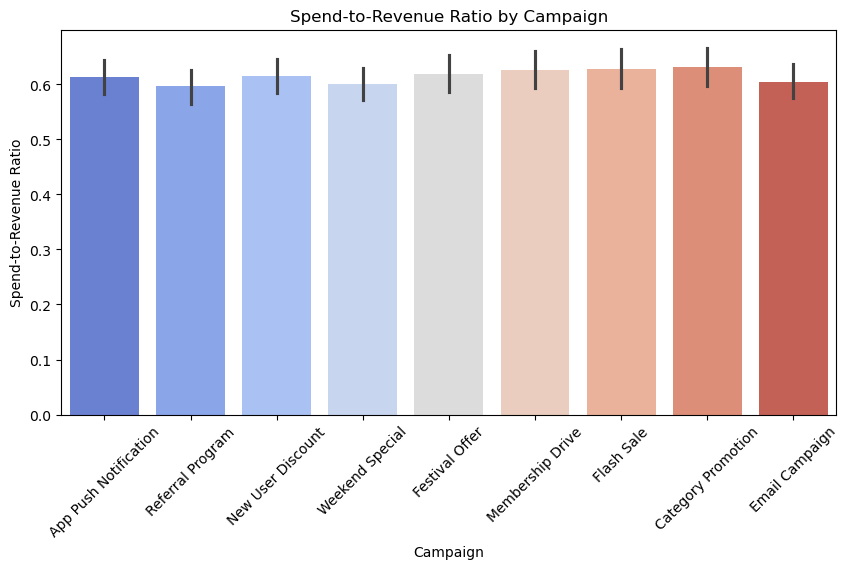

In [115]:
mkt_df['spend_to_revenue_ratio'] = mkt_df['spend'] / mkt_df['revenue_generated']

plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_name', y='spend_to_revenue_ratio', data=mkt_df.sort_values(by='spend_to_revenue_ratio'), palette='coolwarm')
plt.title("Spend-to-Revenue Ratio by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Spend-to-Revenue Ratio")
plt.xticks(rotation=45)
plt.show()

In [116]:
#move this visual up

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_2312/3730438155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='roas', data=mkt_df, palette='pastel')


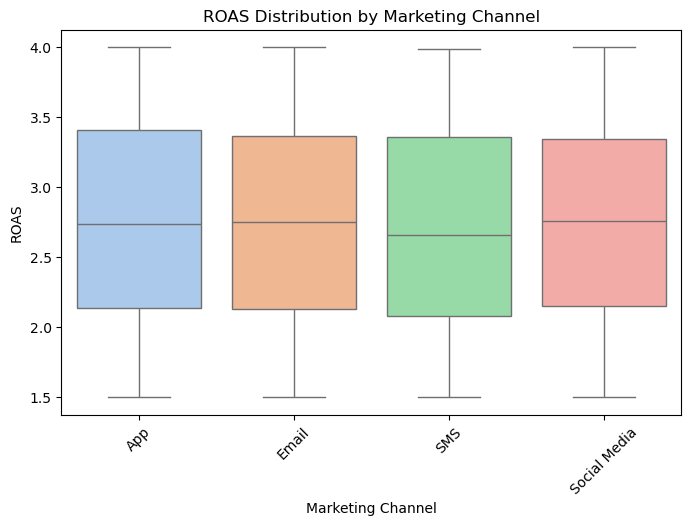

In [117]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='channel', y='roas', data=mkt_df, palette='pastel')
plt.title("ROAS Distribution by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("ROAS")
plt.xticks(rotation=45)
plt.show()

Shows whether higher budget allocation leads to higher conversions:

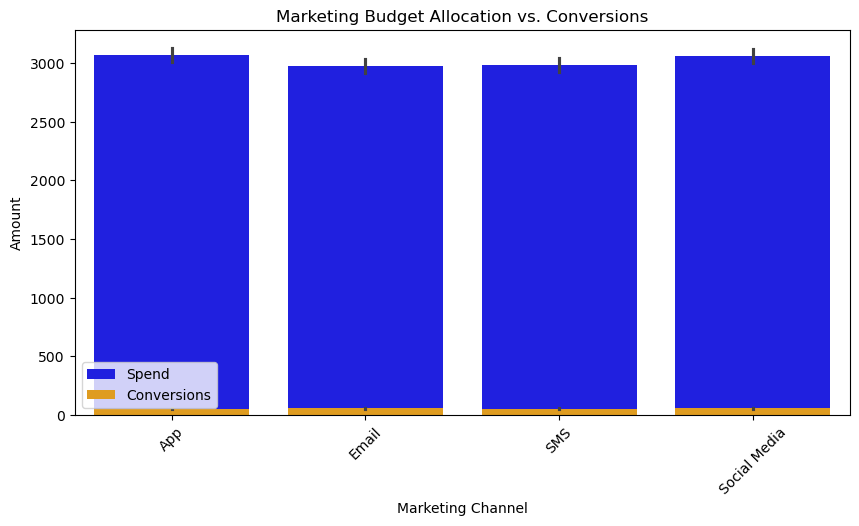

In [119]:
plt.figure(figsize=(10, 5))
sns.barplot(x='channel', y='spend', data=mkt_df, color='blue', label='Spend')
sns.barplot(x='channel', y='conversions', data=mkt_df, color='orange', label='Conversions')
plt.title("Marketing Budget Allocation vs. Conversions")
plt.xlabel("Marketing Channel")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Which audience segments yield the best ROAS:


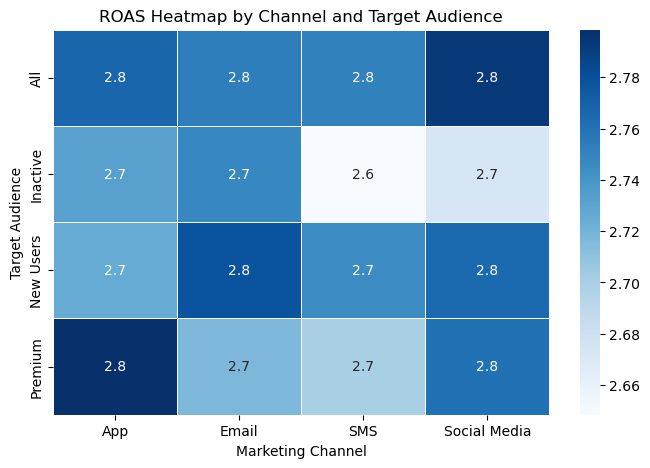

In [121]:
pivot = mkt_df.pivot_table(values='roas', index='target_audience', columns='channel', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='Blues', linewidths=0.5)
plt.title("ROAS Heatmap by Channel and Target Audience")
plt.xlabel("Marketing Channel")
plt.ylabel("Target Audience")
plt.show()

## File 5: Blinkit Inventory- likely to OMIT **NOTE -NEW version, or og version**

In [123]:
df5 = pd.read_csv('/Users/tovi/Documents/blinkit_inventoryNew.csv')
df5

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1
...,...,...,...,...
18100,837480,Nov-24,3,0
18101,56589,Nov-24,3,0
18102,679284,Nov-24,3,0
18103,673058,Nov-24,3,0


### File 6: Inventory- likely to OMIT

In [125]:
inventory_df = pd.read_csv('/Users/tovi/Documents/blinkit_inventory.csv')
inventory_df

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2
...,...,...,...,...
75167,298985,05-11-2024,3,0
75168,679284,05-11-2024,3,0
75169,240179,05-11-2024,3,0
75170,673058,05-11-2024,3,2


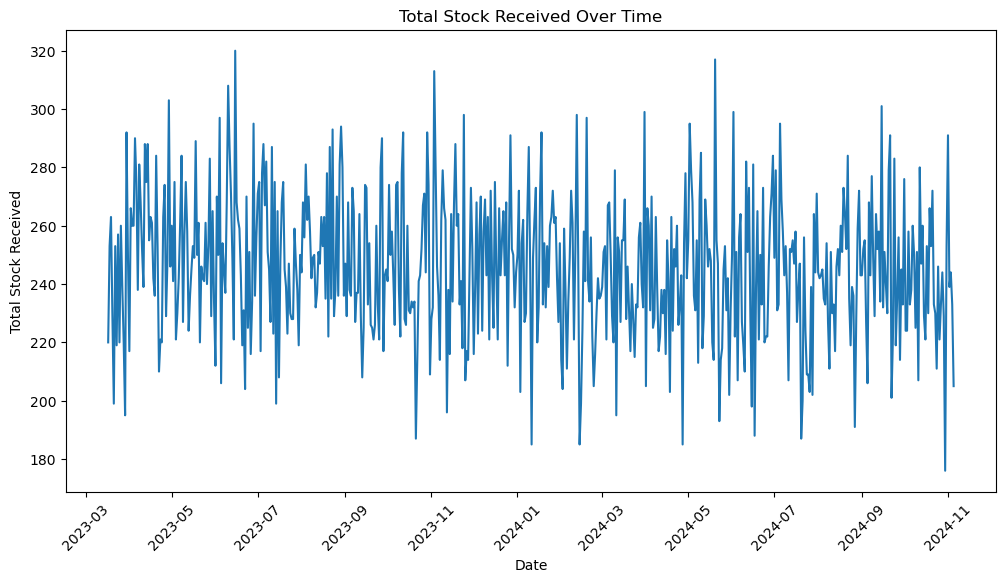

In [126]:
inventory_df['date'] = pd.to_datetime(inventory_df['date'], format="%d-%m-%Y")

# Group by date and sum stock received
daily_stock = inventory_df.groupby('date')['stock_received'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_stock.index, y=daily_stock.values)
plt.xlabel("Date")
plt.ylabel("Total Stock Received")
plt.title("Total Stock Received Over Time")
plt.xticks(rotation=45)
plt.show()

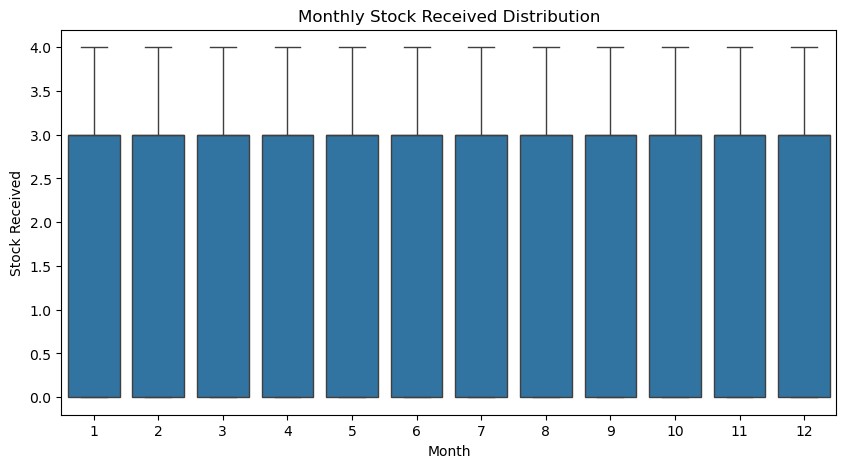

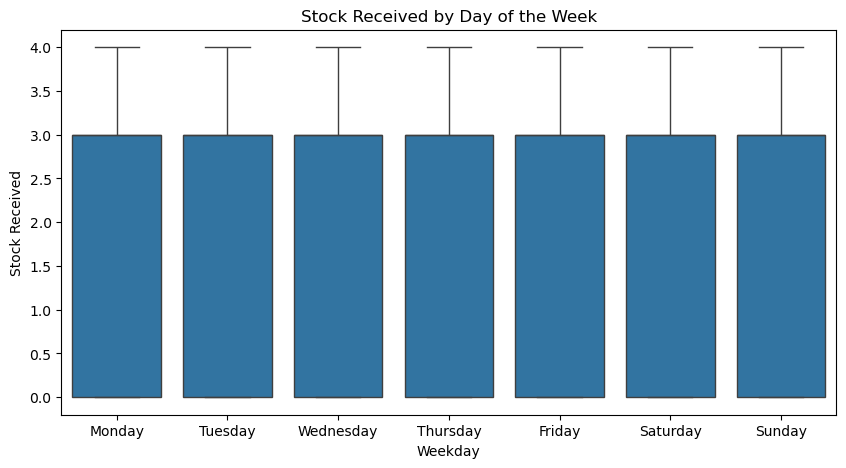

In [127]:
# Extract month and weekday
inventory_df['month'] = inventory_df['date'].dt.month
inventory_df['weekday'] = inventory_df['date'].dt.day_name()

# Monthly trend
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['month'], y=inventory_df['stock_received'])
plt.xlabel("Month")
plt.ylabel("Stock Received")
plt.title("Monthly Stock Received Distribution")
plt.show()

# Weekly trend
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['weekday'], y=inventory_df['stock_received'], order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Weekday")
plt.ylabel("Stock Received")
plt.title("Stock Received by Day of the Week")
plt.show()


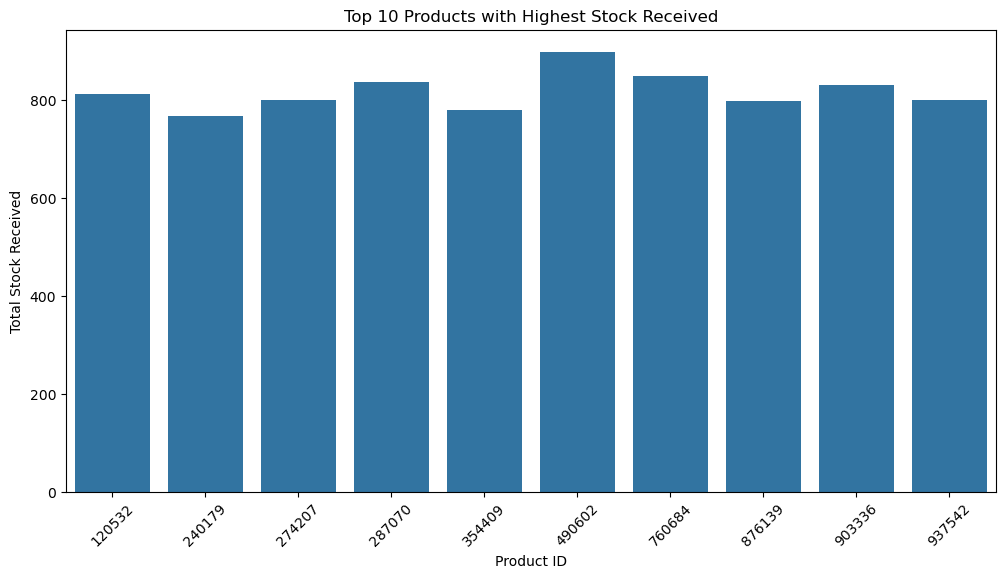

In [128]:
# Total stock received per product
product_stock = inventory_df.groupby('product_id')['stock_received'].sum()

# Top 10 products with highest stock received
top_products = product_stock.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xlabel("Product ID")
plt.ylabel("Total Stock Received")
plt.title("Top 10 Products with Highest Stock Received")
plt.xticks(rotation=45)
plt.show()


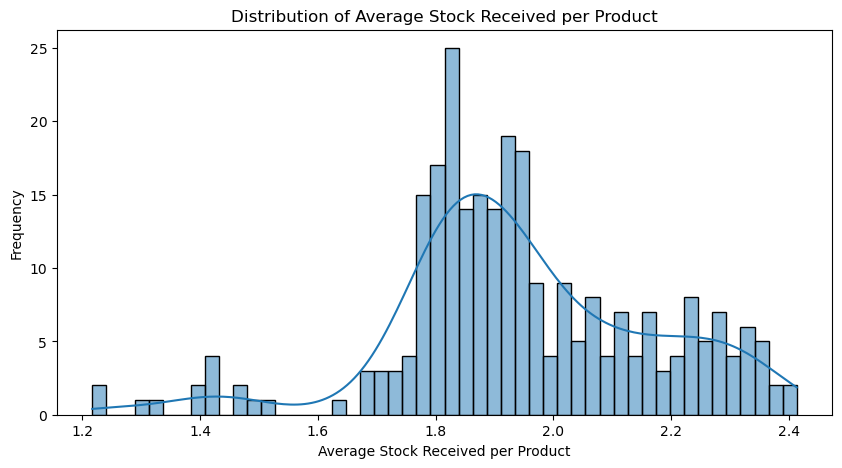

In [129]:
# What is the average stock received per product?

# Calculate mean stock received per product
avg_stock_per_product = inventory_df.groupby('product_id')['stock_received'].mean()

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(avg_stock_per_product, bins=50, kde=True)
plt.xlabel("Average Stock Received per Product")
plt.ylabel("Frequency")
plt.title("Distribution of Average Stock Received per Product")
plt.show()


In [130]:
#What percentage of received stock is damaged on average?

# Calculate total stock and damaged stock
total_stock = inventory_df['stock_received'].sum()
total_damaged = inventory_df['damaged_stock'].sum()

# Calculate percentage
damage_percentage = (total_damaged / total_stock) * 100
print(f"Average percentage of damaged stock: {damage_percentage:.2f}%")


Average percentage of damaged stock: 54.41%


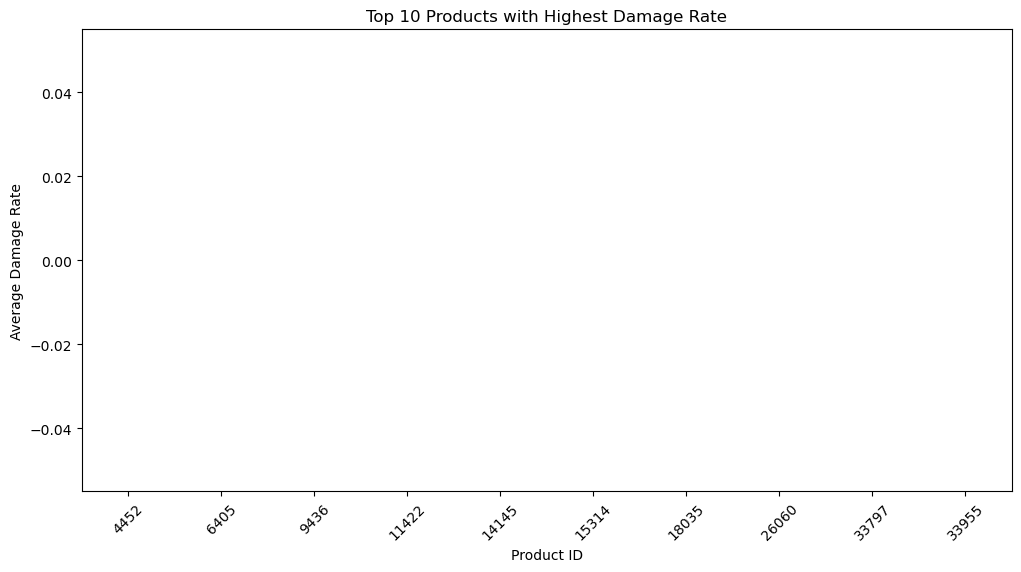

In [131]:
#are there certain products that consistently have higher damage rates?

# Calculate damage rate per product
inventory_df['damage_rate'] = inventory_df['damaged_stock'] / inventory_df['stock_received']
product_damage = inventory_df.groupby('product_id')['damage_rate'].mean()

# Top 10 products with highest damage rate
top_damaged_products = product_damage.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_damaged_products.index, y=top_damaged_products.values)
plt.xlabel("Product ID")
plt.ylabel("Average Damage Rate")
plt.title("Top 10 Products with Highest Damage Rate")
plt.xticks(rotation=45)
plt.show()


In [132]:
inventory_df['damage_rate'].nlargest(10)

8     inf
9     inf
11    inf
14    inf
18    inf
19    inf
23    inf
25    inf
28    inf
30    inf
Name: damage_rate, dtype: float64

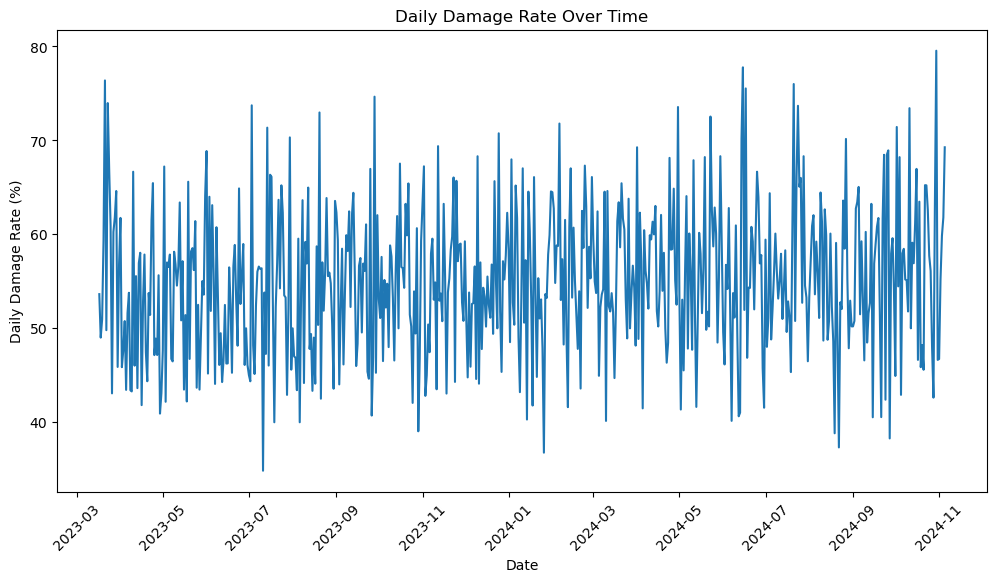

In [133]:
# how does damage rate change over time

# Calculate daily damage rate
daily_damage_rate = (inventory_df.groupby('date')['damaged_stock'].sum() /
                     inventory_df.groupby('date')['stock_received'].sum()) * 100

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_damage_rate.index, y=daily_damage_rate.values)
plt.xlabel("Date")
plt.ylabel("Daily Damage Rate (%)")
plt.title("Daily Damage Rate Over Time")
plt.xticks(rotation=45)
plt.show()


### File 7: Blinkit Delivery Times: **NOTE maybe to be excluded- order_df shows delivery times and stats, only one unique value for reasons_if_delayed which is traffic.**

In [135]:
df7 = pd.read_csv('/Users/tovi/Documents/blinkit_delivery_performance.csv')
df7

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic
...,...,...,...,...,...,...,...,...
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN


In [136]:
df7['reasons_if_delayed'].nunique()

1

### File 8: Blinkit Customers

In [138]:
cust_df = pd.read_csv('/Users/tovi/Documents/blinkit_customers.csv')
cust_df

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [139]:
#only keep desired columns
columns=['customer_id', 'area', 'registration_date', 'customer_segment', 'total_orders', 'avg_order_value']


In [140]:
# Convert registration_date to datetime
cust_df['registration_date'] = pd.to_datetime(cust_df['registration_date'])

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_2312/4214343589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cust_df['customer_segment'], palette='viridis')


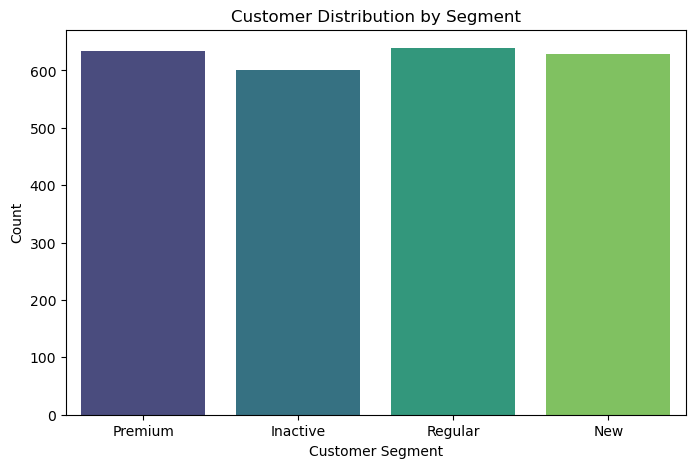

In [141]:
# 1. Distribution of customers across different segments
plt.figure(figsize=(8, 5))
sns.countplot(x=cust_df['customer_segment'], palette='viridis')
plt.title("Customer Distribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.show()

In [142]:
# 2. Average total orders per customer segment
avg_orders = cust_df.groupby('customer_segment')['total_orders'].mean().sort_values()
print("Average Total Orders per Customer Segment:\n", avg_orders)


Average Total Orders per Customer Segment:
 customer_segment
Premium     10.192733
Regular     10.325509
Inactive    10.583333
New         10.874204
Name: total_orders, dtype: float64


In [143]:
# 3. Average order value across customer segments
avg_order_value = cust_df.groupby('customer_segment')['avg_order_value'].mean()
print("Average Order Value per Customer Segment:\n", avg_order_value)

Average Order Value per Customer Segment:
 customer_segment
Inactive    1102.150000
New         1116.635557
Premium     1101.473965
Regular     1089.467042
Name: avg_order_value, dtype: float64


In [144]:
# 4. Percentage of customers with fewer than 5 orders
low_order_percentage = (cust_df[cust_df['total_orders'] < 5].shape[0] / cust_df.shape[0]) * 100
print(f"Percentage of customers with fewer than 5 orders: {low_order_percentage:.2f}%")

Percentage of customers with fewer than 5 orders: 19.96%


In [145]:
# 5. Total revenue generated by each customer segment
cust_df['total_revenue'] = cust_df['total_orders'] * cust_df['avg_order_value']
total_revenue = cust_df.groupby('customer_segment')['total_revenue'].sum()
print("Total Revenue by Customer Segment:\n", total_revenue)

Total Revenue by Customer Segment:
 customer_segment
Inactive    7107041.74
New         7679432.62
Premium     7081961.18
Regular     7158658.67
Name: total_revenue, dtype: float64


Correlation between Total Orders and Average Order Value:
                  total_orders  avg_order_value
total_orders         1.000000         0.014875
avg_order_value      0.014875         1.000000


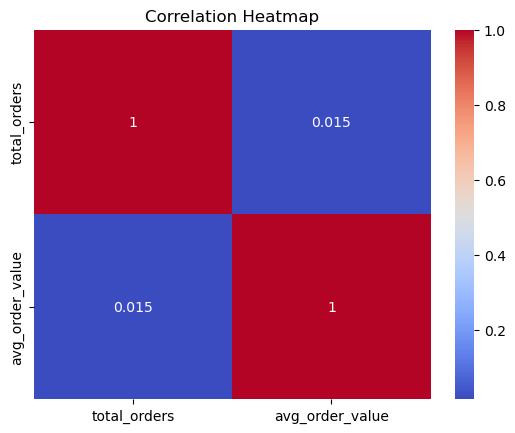

In [146]:
# 6. Correlation between total orders and average order value
correlation = cust_df[['total_orders', 'avg_order_value']].corr()
print("Correlation between Total Orders and Average Order Value:\n", correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [147]:
# 7. Highest and lowest average order values
max_order_value = cust_df['avg_order_value'].max()
min_order_value = cust_df['avg_order_value'].min()
print(f"Highest Average Order Value: {max_order_value}")
print(f"Lowest Average Order Value: {min_order_value}")


Highest Average Order Value: 1999.83
Lowest Average Order Value: 200.43


In [148]:
# 8. Area with the highest number of registered customers
top_area = cust_df['area'].value_counts().idxmax()
print(f"Area with the most customers: {top_area}")

Area with the most customers: Jalna


In [149]:
# 8. Area with the lowest number of registered customers
top_area = cust_df['area'].value_counts().idxmin()
print(f"Area with the fewest customers: {top_area}")

Area with the fewest customers: Mangalore


In [150]:
# 9. Average order value per area
area_avg_order_value = cust_df.groupby('area')['avg_order_value'].mean()
print("Average Order Value per Area:\n", area_avg_order_value)

Average Order Value per Area:
 area
Adoni             796.457778
Agartala          919.827500
Agra             1216.622000
Ahmedabad         929.483333
Ahmednagar        777.356667
                    ...     
Vijayanagaram     896.838000
Vijayawada       1272.813750
Visakhapatnam    1102.930909
Warangal         1057.992222
Yamunanagar      1112.492000
Name: avg_order_value, Length: 316, dtype: float64


## get max of this value as well

In [152]:
# 10. Areas with the highest percentage of Premium customers
premium_distribution = cust_df[cust_df['customer_segment'] == 'Premium']['area'].value_counts()
print("Areas with highest Premium customer count:\n", premium_distribution.head())

Areas with highest Premium customer count:
 area
Kota         7
Orai         6
Burhanpur    6
Etawah       6
Purnia       6
Name: count, dtype: int64


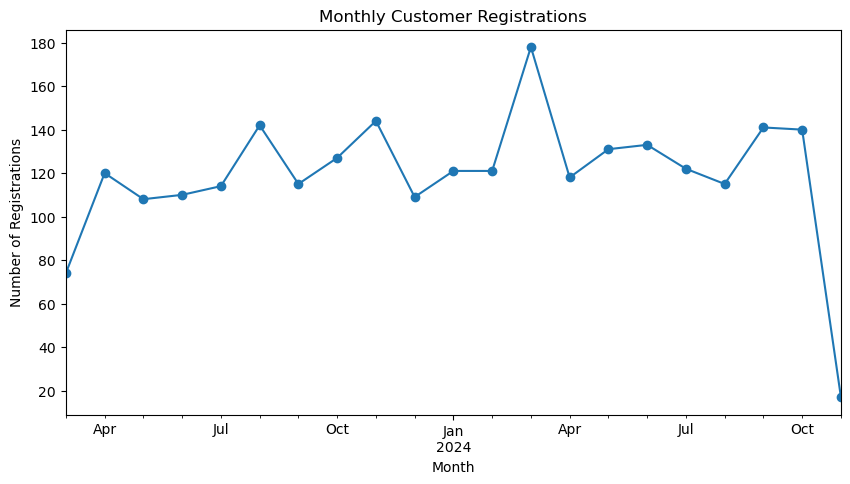

In [153]:
# 11. Monthly customer registrations
cust_df['registration_month'] = cust_df['registration_date'].dt.to_period("M")
monthly_registrations = cust_df['registration_month'].value_counts().sort_index()
monthly_registrations.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Customer Registrations")
plt.xlabel("Month")
plt.ylabel("Number of Registrations")
plt.show()

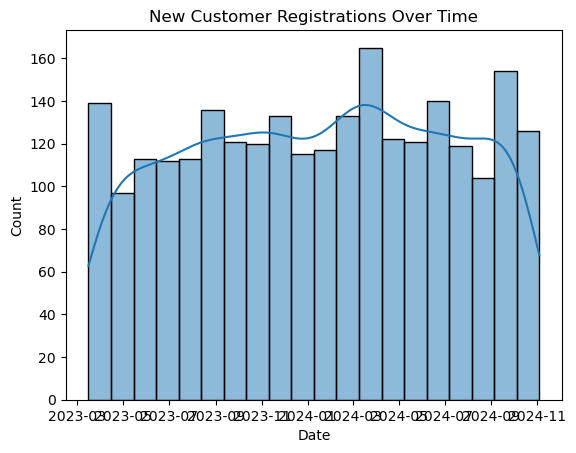

In [154]:
# 12. Trend of new customer registrations over time
sns.histplot(cust_df['registration_date'], bins=20, kde=True)
plt.title("New Customer Registrations Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_2312/1404655137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)


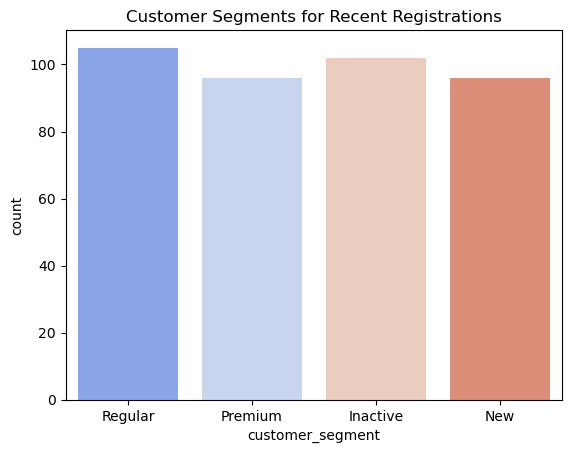

In [155]:
# 13. Recent customer segment distribution (last 3 months)
recent_customers = cust_df[cust_df['registration_date'] >= cust_df['registration_date'].max() - pd.DateOffset(months=3)]
sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)
plt.title("Customer Segments for Recent Registrations")
plt.show()

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_2312/2483830825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)


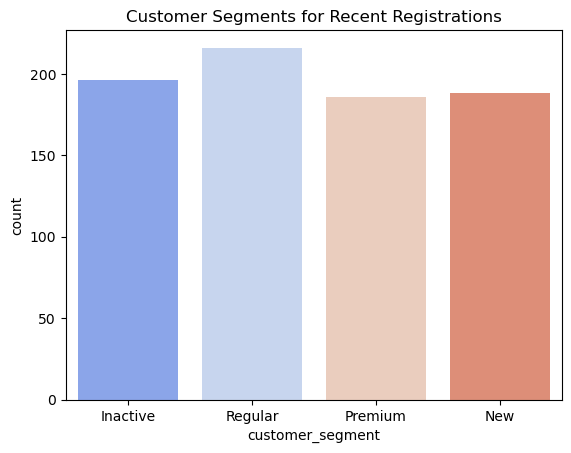

In [156]:
# 13. Recent customer segment distribution (last 6 months)
recent_customers = cust_df[cust_df['registration_date'] >= cust_df['registration_date'].max() - pd.DateOffset(months=6)]
sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)
plt.title("Customer Segments for Recent Registrations")
plt.show()

### File 9: Blinkit Customer Feedback

In [158]:
feedback_df = pd.read_csv('/Users/tovi/Documents/blinkit_customer_feedback.csv')
feedback_df

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
...,...,...,...,...,...,...,...,...
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06


Overall Rating Distribution:

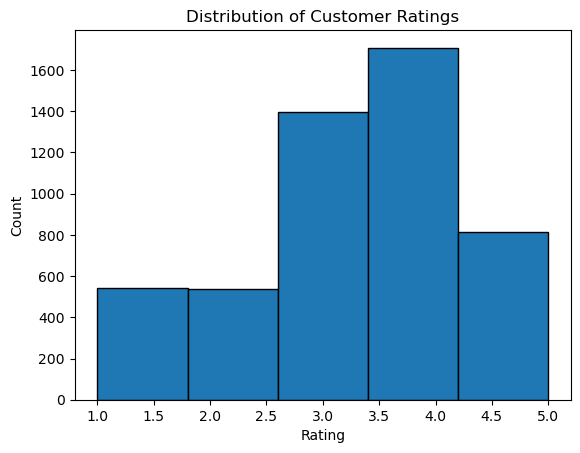

In [160]:
feedback_df['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Customer Ratings')
plt.show()

Sentiment Distribution

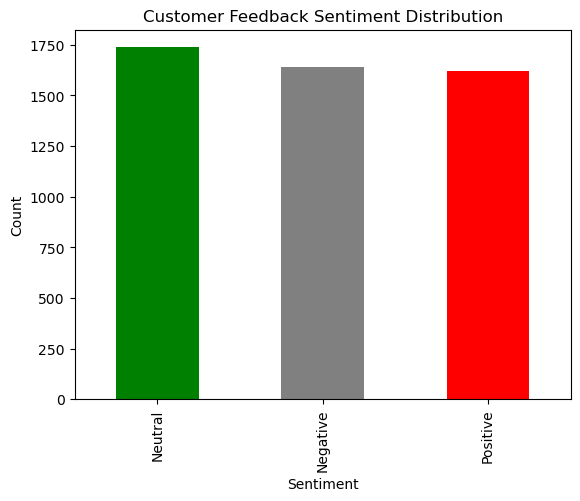

In [162]:
# Count occurrences of each sentiment
sentiment_counts = feedback_df['sentiment'].value_counts()

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Customer Feedback Sentiment Distribution')
plt.show()

Average Rating per Feedback Category:

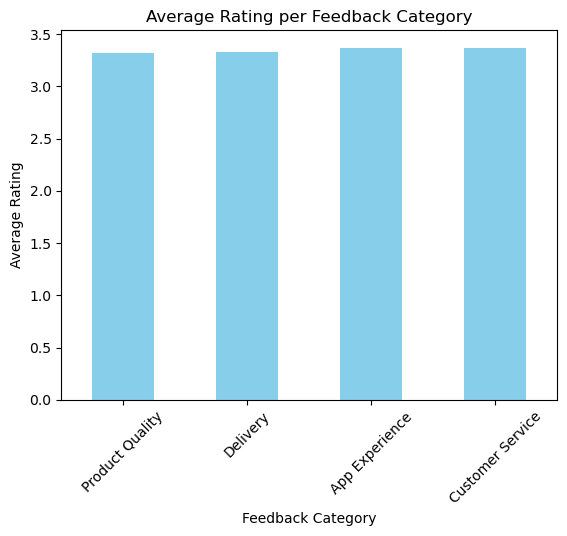

In [164]:
category_avg_rating = feedback_df.groupby('feedback_category')['rating'].mean().sort_values()

# Plot category vs. average rating
category_avg_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Feedback Category')
plt.ylabel('Average Rating')
plt.title('Average Rating per Feedback Category')
plt.xticks(rotation=45)
plt.show()

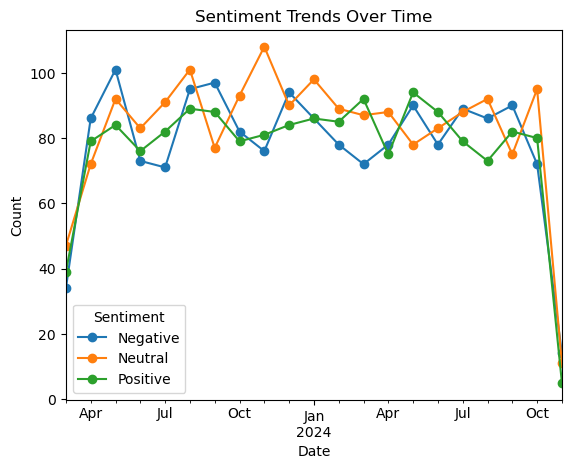

In [165]:
feedback_df['feedback_date'] = pd.to_datetime(feedback_df['feedback_date'])

# Count sentiment over time
sentiment_trend = feedback_df.groupby(feedback_df['feedback_date'].dt.to_period('M'))['sentiment'].value_counts().unstack()

# Plot sentiment trend
sentiment_trend.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Trends Over Time')
plt.legend(title='Sentiment')
plt.show()

In [166]:
from collections import Counter
import re

# Combine all negative feedback
negative_feedback = ' '.join(feedback_df[feedback_df['sentiment'] == 'Negative']['feedback_text'])

# Tokenize and count words
words = re.findall(r'\b\w+\b', negative_feedback.lower())
word_counts = Counter(words)

# Get 10 most common words
common_words = word_counts.most_common(20)
print(common_words)

[('was', 1158), ('the', 651), ('i', 526), ('not', 479), ('delivery', 360), ('order', 324), ('late', 182), ('and', 182), ('unhappy', 182), ('product', 178), ('damaged', 178), ('during', 178), ('worth', 175), ('price', 175), ('paid', 175), ('had', 169), ('a', 169), ('bad', 169), ('experience', 169), ('incorrect', 166)]


**TO DO**
- create separate doc for analysis w SQL documentation
- upload CSVs to pgadmin
- select files for PYTHON EDA, NOT SQL, reduce it, upload, view, and choose- explain in beginning why certain python files were left out of the python analysis
- should anything be combined?
- choose top 2-3 files for matplot and numpy demo
- Tableau dashboard

## Exploratory 